In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [9]:
cat grid_search.py

import numpy as np
import yt
import sklearn
yt.funcs.mylog.setLevel(50)
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cross_validation import cross_val_score
from sklearn.cluster import KMeans
from sklearn.grid_search import GridSearchCV
DEBUG= True
def debug(s,n=""):
    if DEBUG:
	print s
	print n
debug("Loading Particle Data")
ds = yt.load("../ds14_scivis_0128_e4_dt04_1.0000")
ad = ds.all_data()
x = ad[("all","particle_position_x")]
y = ad[("all","particle_position_y")]
z = ad[("all","particle_position_z")]
debug("Creating train test split samples")
train = []
test = []
N = 20#50
N_split = 4#10
for n in np.arange(N):
    if n >N_split:
#         train.append(list(get_halo(filtered_catalog)[-1][n][0])[:6])
        train.append([x[n].in_cgs(),y[n].in_cgs(),z[n].in_cgs()])
    elif n<N_split:
#         test.append(list(get_halo(filtered_catalog)[-1][n][0])[:6])
        test.append([x[n].in_cgs(),y[n].in_cgs(),z[n].in_cgs()])
train = np.array(train)

In [5]:
info = np.loadtxt("info.txt")
scores= np.loadtxt("scores.txt")

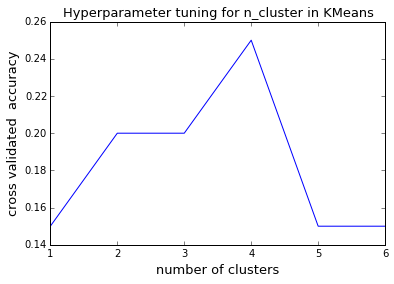

In [8]:
plt.title("Hyperparameter tuning for n_cluster in KMeans",fontsize=13)
k_range=info[:,0]
grid_mean_scores=[mean(i) for i in scores]
plt.plot(k_range, grid_mean_scores)
plt.xlabel("number of clusters",fontsize=13)
plt.ylabel("cross validated  accuracy",fontsize=13)

So  large K values is not good 

In [268]:
True

True

In [237]:
print grid.best_score_
print grid.best_params_
print grid.best_estimator_

0.59
{'n_clusters': 3}
KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


The best model is k=3 at least for this data set 

I am going to pack this up and run with njob on the whole dataset and then analyze the results 

__Things to try later: __

- trying multiple parameter search (for parameter tuning) or model selection by comparing the clustering accuracy of
different unsupervised algorithms 
- visualiztion of data by  projecting the clustered result onto a 2D plane
    - then plot centroid 
- RandomizedSearchCV searches the parameter space randomly and not exhaustively for every parameter, this is usually "good enough" but lets stick with GridSearch for now

Remembering that in our train-test split we still had some test data , now we can use the best parameter module to make predictions 

In [239]:
# test

In [243]:
clf = KMeans(n_clusters=grid.best_params_["n_clusters"])
clf.fit(test)
centers=clf.cluster_centers_
labels=clf.predict(test)

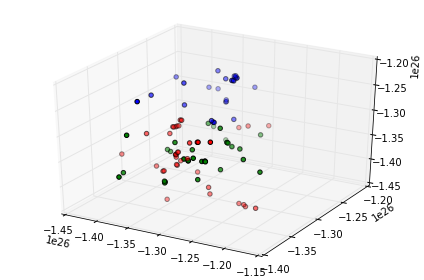

In [245]:
data=test
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
color = ["red","green","blue","cyan","purple","orange","magenta","brown","yellow","lime"]
for i in range(num_clusters):
    group  = np.where(labels==i)
    ax.scatter(data[group,0], data[group,1],data[group,2],c=color[i])#, c=c, marker=m)
fig.tight_layout()

Here is the new predicted result on the new test data

A better way to visualized the data is probably a 2D projection 

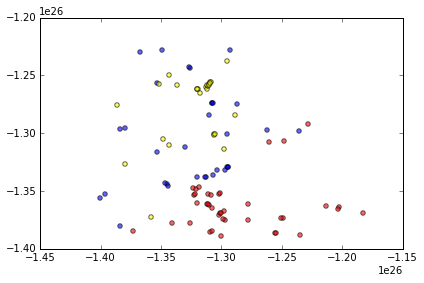

In [252]:
data=test
fig = plt.figure()
ax = fig.add_subplot(111)
color = ["red","blue","yellow","cyan","purple","orange","magenta","green","brown","lime"]
for i in range(num_clusters):
    group  = np.where(labels==i)
    ax.scatter(data[group,0], data[group,1],c=color[i],alpha=0.6)#,data[group,2]#, c=c, marker=m)
fig.tight_layout()

In [277]:
grid.grid_scores_

AttributeError: 'GridSearchCV' object has no attribute 'grid_scores_'

Centroid locations 

Actually 2D projection is probably bad because these are 3D strucutres 

## Resources

- scikit-learn documentation: [Grid search](http://scikit-learn.org/stable/modules/grid_search.html), [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html), [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.RandomizedSearchCV.html)
- Timed example: [Comparing randomized search and grid search](http://scikit-learn.org/stable/auto_examples/model_selection/randomized_search.html)
- scikit-learn workshop by Andreas Mueller: [Video segment on randomized search](https://youtu.be/0wUF_Ov8b0A?t=17m38s) (3 minutes), [related notebook](http://nbviewer.ipython.org/github/amueller/pydata-nyc-advanced-sklearn/blob/master/Chapter%203%20-%20Randomized%20Hyper%20Parameter%20Search.ipynb)
- Paper by Yoshua Bengio: [Random Search for Hyper-Parameter Optimization](http://www.jmlr.org/papers/volume13/bergstra12a/bergstra12a.pdf)